# K Nearest Neighbors

KNN makes predictions using the training dataset directly. Predictions are made for a new data point by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances. For regression this might be the mean output variable, in classification this might be the most common class value.

To determine which of the K instances in the training dataset are most similar to a new input a distance measure is used. For real-valued input variables, the most popular distance measure is **Euclidean distance**. Euclidean distance is calculated as the **square root of the sum of the squared differences between a point a and point b across all input attributes i**.

### $EuclideanDistance(a, b) = \sqrt{\sum\limits_{i=1}^n (a_i - b_i)^2}$

Generally taking square root can be skipped for performance reasons. You probably don’t need the distance in the actual units, and the square root function is relatively expensive compared to other operations and will be performed many times per new data instance that is to be classified.

Other popular distance measures include:
* Hamming Distance: Calculate the distance between binary vectors.
* Manhattan Distance: Calculate the distance between real vectors using the sum of their absolute difference. Also called City Block Distance.
* Minkowski Distance: Generalization of Euclidean and Manhattan distance.


## Creating Fake Data

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=101)

In [3]:
print("First 5 X:")
print(X[0:5,])
print("\nFirst 5 y:")
print(y[0:5])

First 5 X:
[[ 2.34669706  1.99811892]
 [ 2.40710326  2.2038783 ]
 [-0.077088   -1.43258858]
 [ 2.73918283  1.15325581]
 [-0.75506174  0.61430643]]

First 5 y:
[1 1 0 1 1]


In [4]:
import matplotlib.pyplot as plt

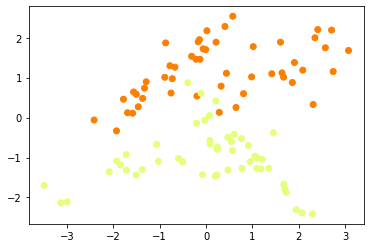

In [5]:
plt.scatter(X[:,0], X[:,1], c = y, cmap="Wistia")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Prepare data & methods for KNN

In [8]:
import pandas as pd

In [9]:
Xd = pd.DataFrame(X_train, columns=['X1', 'X2'])
yd = pd.DataFrame(y_train, columns=['y'])

In [10]:
data = pd.concat([Xd, yd], axis = 1)

In [11]:
data.head()

,X1,X2,y
0,-1.722413,-0.928353,0
1,-0.029337,-0.066258,0
2,1.353052,-1.272061,0
3,2.083187,1.188619,1
4,-0.077088,-1.432589,0


In [12]:
K = 5

In [13]:
def euclidean_distance(a, b):
    sum = 0
    for i in range(len(a)):
        sum += (a[i]-b[i])**2
    return sum

## Prediction in KNN

In [14]:
def predict_one(a):
    l=[]
    for i in range(len(data)):
        l.append(euclidean_distance(a, data.iloc[i]))
    data['ed'] = l
    top_K = data.sort_values(by=['ed']).iloc[0:K]
    top_classes = list(top_K['y'])
    return max(set(top_classes), key = top_classes.count)

In [15]:
def predict(X):
    l=[]
    for i in X:
        l.append(predict_one(i))
    return l

In [16]:
prediction = predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 9  1]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [19]:
l = []
for i in range(len(y_test)):
    if(prediction[i] == y_test[i]):
        l.append(y_test[i])
    else:
        l.append(2)

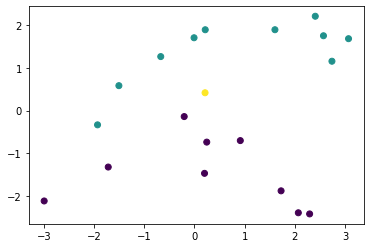

In [20]:
plt.scatter(X_test[:,0], X_test[:,1], c = l, cmap="viridis")